In [1]:
# !pip install numpy
# !pip install matplotlib
# !pip install pandas
# !python.exe -m pip install --upgrade pip

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

c:\Users\aksi01\Miniconda3\envs\qns\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\aksi01\Miniconda3\envs\qns\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\aksi01\Miniconda3\envs\qns\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data_test\\return.csv')
classical = data.iloc[:, 0:6].mean(axis=1)
quantum = data.iloc[:, 6:12].mean(axis=1)

## Variance

In [4]:
res = stats.levene(classical, quantum)
res.pvalue

0.8557200140323519

In [5]:
res = stats.bartlett(classical, quantum)
res.pvalue

0.00044662949280115273

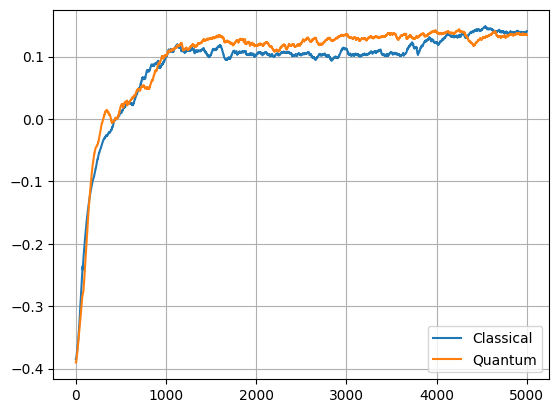

In [6]:
ep = np.arange(0,5000)
plt.grid(visible=True)
plt.plot(ep, classical, label='Classical')
plt.plot(ep, quantum, label='Quantum')
plt.legend()
plt.show()

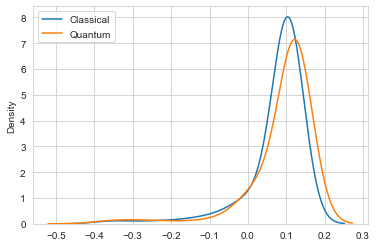

In [8]:
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(classical, bw=0.5, label='Classical')
sns.kdeplot(quantum, bw=0.5, label='Quantum')
plt.legend()

In [ ]:
# Variance: Fisher test (F-Statistic)
# Distribution: Kolmogorov (K-statistic)
# Abverage/mean: T test (T statistic)

In [7]:
# Calculate variances
var1 = np.var(classical, ddof=1)  # ddof=1 indicates sample variance
var2 = np.var(quantum, ddof=1)  # ddof=1 indicates sample variance

# Calculate F statistic
F = var1/var2

# Calculate degrees of freedom
df1 = len(classical) - 1
df2 = len(quantum) - 1

# Calculate p-value
p_value = stats.f.cdf(F, df1, df2)

print('F-statistic:', F)
print('p-value:', p_value)

F-statistic: 0.90543668029589
p-value: 0.00022331472346191473


## Distribution 

In [8]:
stats.kstest(classical, quantum)

KstestResult(statistic=0.4736, pvalue=0.0, statistic_location=0.11584695323139999, statistic_sign=1)

## Mean

In [9]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(classical, quantum, method="asymptotic")
print(p)

1.2609144502214888e-187


In [10]:
stats.ttest_ind(classical, quantum, equal_var=False)

Ttest_indResult(statistic=-6.898059953250107, pvalue=5.591769233822963e-12)

# Area Under the Curve

In [5]:
# Calculates the area under the curve
def calc_auc(vector, step=None):
    auc = 0
    bias = min(vector)
    for i in range(1, len(vector)):
        auc += 0.5*(vector.iloc[i]+vector.iloc[i-1] - 2*bias)
#     auc -= bias*len(vector)
    return auc


In [6]:
data = pd.read_csv('data_test\\return.csv')
classical = data.iloc[:, 0:6]
quantum = data.iloc[:, 6:12]

In [7]:
auc_classical = np.array([calc_auc(classical.iloc[:, i]) for i in range(6)])
auc_quantum = np.array([calc_auc(quantum.iloc[:, i]) for i in range(6)])

In [33]:
auc_classical

array([3030.87152773, 1349.92416416, 3103.41023424, 2797.15681679,
       2820.31490168, 1075.99475705])

In [8]:
auc_classical.mean()

2362.9454002745447

In [9]:
auc_quantum.mean()

2440.6129761337424

In [10]:
# Calculate variances
var1 = np.var(auc_classical, ddof=1)  # ddof=1 indicates sample variance
var2 = np.var(auc_quantum, ddof=1)  # ddof=1 indicates sample variance

# Calculate F statistic
F = var1/var2

# Calculate degrees of freedom
df1 = len(auc_classical) - 1
df2 = len(auc_quantum) - 1

# Calculate p-value
p_value = stats.f.cdf(F, df1, df2)

print('F-statistic:', F)
print('p-value:', p_value)


F-statistic: 1.4155421122091074
p-value: 0.6438712821166497


In [11]:
var1**0.5

902.7285173340108

In [12]:
var2**0.5

758.7448652814968

In [40]:
res = stats.bartlett(auc_quantum,auc_classical )
res.pvalue

0.7117372610586279

In [41]:
res = stats.levene(auc_quantum,auc_classical )
res.pvalue

0.8459727467838666

In [42]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(auc_classical, auc_quantum, method="asymptotic")
print(p)

1.0


In [44]:
auc_classical

array([3030.87152773, 1349.92416416, 3103.41023424, 2797.15681679,
       2820.31490168, 1075.99475705])

In [2]:
import random

In [11]:
random.seed(2)
random.randint(1,10)

1